In [1]:
import pandas as pd
df = pd.read_csv("Gasoline_Retail_Prices_Weekly_Average_by_Region__Beginning_2007.csv")

In [2]:
df

,Date,New York State Average ($/gal),Albany Average ($/gal),Batavia Average ($/gal),Binghamton Average ($/gal),Buffalo Average ($/gal),Dutchess Average ($/gal),Elmira Average ($/gal),Glens Falls Average ($/gal),Ithaca Average ($/gal),Kingston Average ($/gal),Nassau Average ($/gal),New York City Average ($/gal),Rochester Average ($/gal),Syracuse Average ($/gal),Utica Average ($/gal),Watertown Average ($/gal),White Plains Average ($/gal)
0,11/27/2023,3.59,3.52,3.63,3.68,3.67,3.57,3.33,3.63,3.63,3.43,3.44,3.63,3.66,3.60,3.63,3.57,3.67
1,11/20/2023,3.63,3.57,3.64,3.72,3.69,3.61,3.40,3.69,3.65,3.48,3.49,3.68,3.71,3.65,3.65,3.63,3.71
2,11/13/2023,3.68,3.62,3.68,3.77,3.72,3.66,3.44,3.74,3.69,3.56,3.56,3.73,3.74,3.70,3.68,3.68,3.74
3,11/06/2023,3.72,3.66,3.75,3.82,3.75,3.71,3.53,3.81,3.72,3.62,3.62,3.77,3.77,3.74,3.72,3.75,3.78
4,10/30/2023,3.76,3.71,3.77,3.85,3.77,3.74,3.61,3.85,3.79,3.66,3.67,3.81,3.81,3.76,3.81,3.79,3.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,11/26/2007,3.28,3.26,NaN,3.25,3.29,NaN,NaN,NaN,NaN,NaN,3.27,3.28,3.28,3.29,3.32,NaN,NaN
836,11/19/2007,3.26,3.24,NaN,3.23,3.27,NaN,NaN,NaN,NaN,NaN,3.25,3.26,3.26,3.28,3.31,NaN,NaN
837,11/12/2007,3.21,3.20,NaN,3.18,3.21,NaN,NaN,NaN,NaN,NaN,3.18,3.18,3.20,3.22,3.25,NaN,NaN
838,11/05/2007,3.10,3.09,NaN,3.08,3.09,NaN,NaN,NaN,NaN,NaN,3.06,3.07,3.09,3.10,3.12,NaN,NaN


In [19]:
# Se establece esta columna a tipo DateTime
df["Date"] = pd.to_datetime(df["Date"])

In [20]:
# Se crea una columna "Year" para dejar solo el año de la fecha
df["Year"] = df["Date"].dt.year

In [23]:
# Se filtra y se establecel el Dataframe que solo contenga los años requieridos 2015 - 2023
df= df[df["Year"]>=2015]

In [44]:
# Se procede a rellenar los valores faltantes con la media y no exista perdida de datos
for i in df:
    promedio = df[i].mean()
    df[i] = df[i].fillna(promedio)


C:\Users\ISMAEL\AppData\Local\Temp\ipykernel_19680\2022536227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].fillna(promedio)


In [47]:
# Se verifica que se hayan rellenado los nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465 entries, 0 to 464
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            465 non-null    datetime64[ns]
 1   New York State Average ($/gal)  465 non-null    float64       
 2   Albany Average ($/gal)          465 non-null    float64       
 3   Batavia Average ($/gal)         465 non-null    float64       
 4   Binghamton Average ($/gal)      465 non-null    float64       
 5   Buffalo Average ($/gal)         465 non-null    float64       
 6   Dutchess Average ($/gal)        465 non-null    float64       
 7   Elmira Average ($/gal)          465 non-null    float64       
 8   Glens Falls Average ($/gal)     465 non-null    float64       
 9   Ithaca Average ($/gal)          465 non-null    float64       
 10  Kingston Average ($/gal)        465 non-null    float64       
 11  Nassau

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

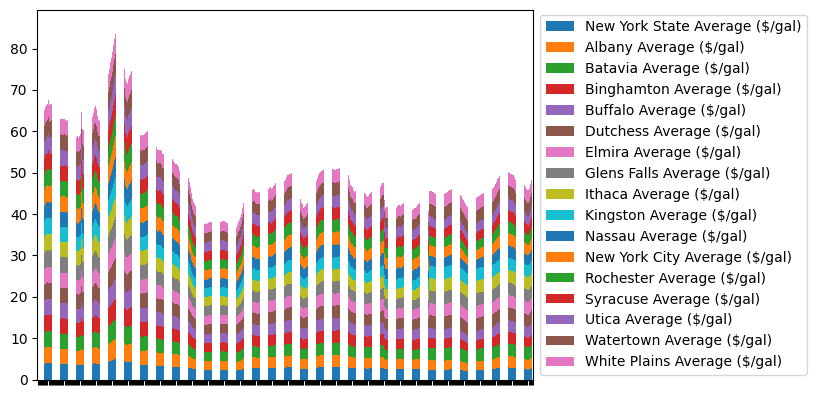

In [74]:
deseado = df[df.columns[~df.columns.isin(["Date","Year"])] ]
df_deseado = deseado
ax =df_deseado.plot.bar(stacked=True)
ax.set_xticklabels([])
legend_ax = plt.subplot(111)
legend_ax.legend(labels=df_deseado.columns,loc="center left",bbox_to_anchor=(1,0.5))
plt.show()

In [75]:
df_promedio_anual

,New York State Average ($/gal),Albany Average ($/gal),Batavia Average ($/gal),Binghamton Average ($/gal),Buffalo Average ($/gal),Dutchess Average ($/gal),Elmira Average ($/gal),Glens Falls Average ($/gal),Ithaca Average ($/gal),Kingston Average ($/gal),Nassau Average ($/gal),New York City Average ($/gal),Rochester Average ($/gal),Syracuse Average ($/gal),Utica Average ($/gal),Watertown Average ($/gal),White Plains Average ($/gal)
Year,,,,,,,,,,,,,,,,,
2015,2.605962,2.524231,3.007521,2.530577,2.578654,3.085722,2.952779,3.033542,3.007493,2.963706,2.628077,2.714615,2.553846,2.461731,2.561154,3.056458,3.151308
2016,2.284808,2.197885,3.007521,2.252500,2.249231,3.010254,2.882074,2.949864,2.932975,2.890201,2.298462,2.394231,2.233462,2.170962,2.241538,2.982636,3.076157
2017,2.549038,2.450385,2.501635,2.499231,2.501538,2.597500,2.456538,2.480769,2.493846,2.467308,2.562115,2.681346,2.477692,2.434808,2.498462,2.533462,2.682500
2018,2.883774,2.777547,2.839811,2.835283,2.863774,2.924906,2.811509,2.805849,2.812264,2.798302,2.879245,2.971132,2.834340,2.807358,2.859434,2.918679,3.017547
2019,2.742885,2.640962,2.700962,2.670769,2.706538,2.806154,2.667500,2.680769,2.680000,2.655000,2.723462,2.836154,2.706731,2.650577,2.709423,2.718654,2.887500
2020,2.334038,2.322500,2.321154,2.278846,2.302115,2.404231,2.189423,2.365000,2.296731,2.270769,2.266731,2.391154,2.315962,2.254038,2.354615,2.350385,2.463269
2021,3.089615,3.049615,3.032885,3.057692,3.018846,3.100577,3.022500,3.105000,3.058462,3.017115,3.071923,3.165192,3.061346,3.046731,3.115385,3.109038,3.170962
2022,4.119808,4.113654,4.090769,4.116538,4.094423,4.187692,4.046154,4.167308,4.147500,4.039231,4.011154,4.158462,4.145000,4.105385,4.171923,4.173654,4.218269
2023,3.670625,3.688333,3.615417,3.687083,3.648958,3.705208,3.598958,3.775208,3.694792,3.625833,3.586667,3.703750,3.691042,3.687083,3.718958,3.718750,3.742292


<AxesSubplot: xlabel='New York City Average ($/gal)', ylabel='Year'>

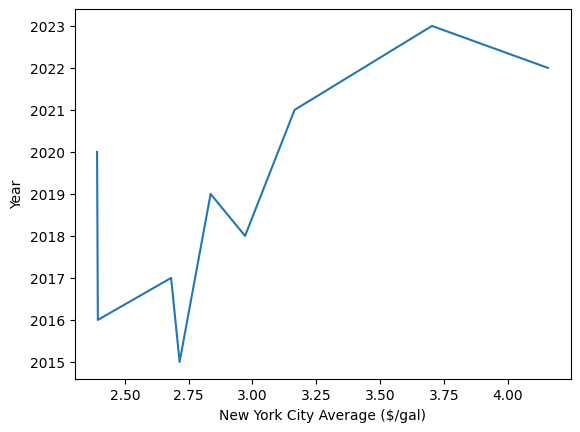

In [90]:
sns.lineplot(data=df_promedio_anual,x="New York City Average ($/gal)",y="Year")